<a href="https://colab.research.google.com/github/wankhede10swapnil/Hotel_Bookings_Analysis/blob/main/Hotel_Booking_Analysis_Swapnil_Wankhede.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

## EDA in the hotel industry is key to marketing strategy, building customer loyalty and enhancing productivity. By analysing the patterns available in the past data, it is helpful to make the hotel’s plan better so that hotel can perform various campaigns to boost the business. The more important things in a competitive business environment is that getting the right insights that should be advantageous. Analysing customer data allows hoteliers to understand the preferences and purposes of a customer. These are some reasons to study on the available dataset. Let’s commence

In [ ]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# To read the file.
path ='/content/drive/MyDrive/Colab Notebooks/Capstone_Project/Copy of Hotel Bookings.csv'
hotel_data_raw = pd.read_csv(path)

# Data Exploration And Data Cleaning


In [ ]:
hotel_data_raw.head() # To display the first five rows of the dataframe by default.

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hotel_data_raw.tail() # To display the last five rows of the dataframe by default.

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
# To view statistical details like percentile, mean, std etc.
hotel_data_raw.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
hotel_data_raw.info() # To get the information about the DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            


The given dataset has nearly 119390 observations with 32 variables which are mix of float type (4), integer type (16) and object type (12) including some missing values and duplicates that effect the dataset. let's clean the data.


In [ ]:
# To find the duplicates.
hotel_data_raw.duplicated().value_counts()
# False - No duplicates. 
# True  - Duplicates.

False    87396
True     31994
dtype: int64

In [ ]:
# To drop 31994 duplicates.
hotel_data_raw = hotel_data_raw.drop(hotel_data_raw.duplicated().value_counts())
hotel_data_raw = hotel_data_raw.drop_duplicates()

In [ ]:
# To find the null values
hotel_data_raw.isnull().sum().sort_values(ascending = False)

company                           82135
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


In [ ]:
# replaces the NULL values with specified values
hotel_data_raw['company'].fillna(0.0,inplace=True)
hotel_data_raw['agent'].fillna(0.0,inplace=True)
hotel_data_raw['country'].fillna('other',inplace=True)
hotel_data_raw['children'].fillna(0.0,inplace=True)

In [ ]:
# Converting datatype of columns 'children', 'company' and 'agent' from float to int.
hotel_data_raw[['children', 'company', 'agent']] = hotel_data_raw[['children', 'company', 'agent']].astype('int64')


It is impossible that entering the hotel with no guests. Hence index of addtion of adults, babies and children is equal to zero is dropped.



In [ ]:
hotel_data_raw[(hotel_data_raw.adults + hotel_data_raw.babies + hotel_data_raw.children) == 0].shape 

(166, 32)

In [ ]:
hotel_data_raw = hotel_data_raw.drop(hotel_data_raw[(hotel_data_raw.adults + hotel_data_raw.babies+hotel_data_raw.children) == 0].index)

In [ ]:
# Adding total staying days in hotels so that total stays in hotel can be analysed.
hotel_data_raw['stays_in_weekend_and_week_nights'] = hotel_data_raw['stays_in_weekend_nights']+hotel_data_raw['stays_in_week_nights']

In [ ]:
hotel_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87228 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   hotel                             87228 non-null  object 
 1   is_canceled                       87228 non-null  int64  
 2   lead_time                         87228 non-null  int64  
 3   arrival_date_year                 87228 non-null  int64  
 4   arrival_date_month                87228 non-null  object 
 5   arrival_date_week_number          87228 non-null  int64  
 6   arrival_date_day_of_month         87228 non-null  int64  
 7   stays_in_weekend_nights           87228 non-null  int64  
 8   stays_in_week_nights              87228 non-null  int64  
 9   adults                            87228 non-null  int64  
 10  children                          87228 non-null  int64  
 11  babies                            87228 non-null  int64  
 12  mea

Updated dataset has nearly 87228 observations with 33 variables by adding new column stays_in_weekend_and_week_nights so that total stays in hotel can be analysed. It is a mix of numerical and categorial variables. By basic inspection, it is found that hotel, arrival_date_months, meal, market_segment, distribution channel, deposit_type etc are categorical variables. Following are variables within dataset have been elaborated with basic meanings.

*  hotel: two types (Resort hotel and City hotel)

* is_canceled:  0 and 1 indicate bookings not cancelled and cancelled resp.

* lead_time : The time between when a guest makes the reservation and the actual check-in.

* arrival_date_year : year of arrival

* arrival_date_month : month of arrival

* arrival_date_week_number : Week number of the arrival date

* arrival_date_day_of_month : Day of the month of the arrival date

* stays_in_weekend_nights : Number of Saturday and Sunday nights when guests stay.

* stays_in_week_nights :Number of week nights (Mon-Fri) when the guests stay.  

* adults :Number of adults

* children :Number of children

* babies :Number of babies

* meal : SC – no meal, BB – Bed & Breakfast, HB – Half board, FB – Full board are types.

* country :Country of origin of guests.

* market_segment :“TA” -“Travel Agents” and “TO” - “Tour Operators” are Market segment designations.

* distribution_channel : The term “TA”-“Travel Agents” and “TO”-“Tour Operators” in Booking distribution channel.

* is_repeated_guest : (0) and (1) are values that indicates, the booking of guest with same name is repeated or not repeated.

* previous_cancellations : No. of past bookings that were cancelled by the customer prior to the current booking

* previous_bookings_not_canceled:No. of previous bookings not cancelled by the customer prior to the current booking

* reserved_room_type :if Code of room type reserved. Code is presented instead of designation

* assigned_room_type :Code for the type of room assigned to the booking.

* booking_changes : Number of changes made to the booking from the moment the booking was entered until the moment of check-in or cancellation

* deposit_type : Type of deposit made for booking: No Deposit ,Non Refundable and Refundable.

* agent : the travel agency's ID that made the bookings.

* company : ID of the company that is responsible for paying the booking

* days_in_waiting_list :Number of days the bookings were in the waiting list before it was confirmed.

* customer_type :Type of booking :Contract, Group , Transient, Transient-party

* adr :Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

* required_car_parking_spaces:Number of car parking spaces required by the customers

* total_of_special_requests : Number of special requests made by the customers.

* reservation_status :Reservation last status like Canceled ,Check-Out , No-Show.

* reservation_status_date : Date at which the last status was set.





# * 01)  Percentages of bookings have been cancelled and not cancelled month wise
# *      The best time to book a hotel room



In [ ]:
# To check the counts of canceled and not canceled bookings
hotel_data_raw['is_canceled'].value_counts()

0    63219
1    24009
Name: is_canceled, dtype: int64

is_canceled variable takes binary values o and 1


*   o indicates bookings not canceled
*   1 indicates bookings canceled



In [ ]:
hotel_data_raw['arrival_date_month'].value_counts()

August       11242
July         10043
May           8344
April         7899
June          7756
March         7489
October       6921
September     6682
February      6083
December      5112
November      4973
January       4684
Name: arrival_date_month, dtype: int64

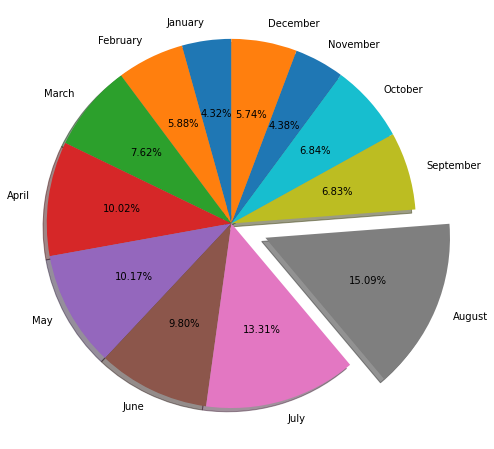

In [ ]:
# To get the canceled bookings dataframe.
canceled_df= hotel_data_raw.loc[hotel_data_raw['is_canceled']==1,'arrival_date_month'].value_counts()
canceled_df = pd.DataFrame(canceled_df)
# pie chart
plt.rcParams["figure.figsize"] = (8,8)
labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September','October', 'November', 'December']
sizes = canceled_df['arrival_date_month'].reindex(labels)
explode = (0, 0, 0, 0, 0, 0, 0, 0.2, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Aug')
plt.pie(sizes, labels=labels, explode=explode, autopct='%1.2f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


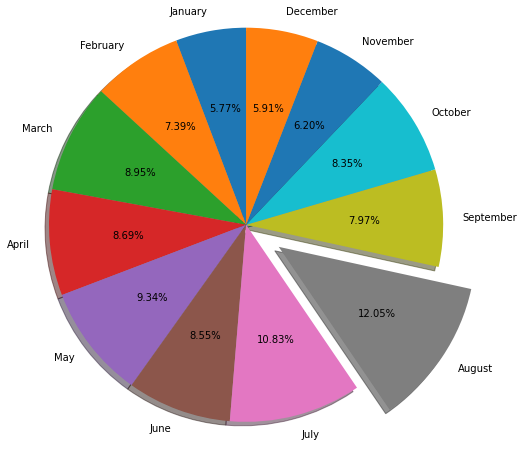

In [ ]:
# To get the non canceled bookings dataframe.
not_canceled_df= hotel_data_raw.loc[hotel_data_raw['is_canceled']==0,'arrival_date_month'].value_counts()
not_canceled_df = pd.DataFrame(not_canceled_df)
# pie chart
plt.rcParams["figure.figsize"] = (8,8)
labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September','October', 'November', 'December']
sizes = not_canceled_df['arrival_date_month'].reindex(labels)
explode = (0, 0, 0, 0, 0, 0, 0, 0.2, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Aug')
plt.pie(sizes, labels=labels, explode=explode, autopct='%1.2f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

 

*   15.09% bookings have been cancelled in augest month which is maximun among all months
*   12.05 bookings have not been cancelled in augest month which is maximum among all months.

As a result, most hotel rooms are booked in augest month which is the best time of year to book a hotel room.



# 02)	Which type of hotels are mostly booked in weekend nights and week_nights?


In [ ]:
#To compute a simple cross tabulation of hotel and stays_in_weekend_nights.
pd.crosstab(index=hotel_data_raw['hotel'], columns=hotel_data_raw['stays_in_weekend_and_week_nights'])

stays_in_weekend_and_week_nights,0,1,2,3,4,5,6,7,8,9,...,34,35,38,42,45,46,48,56,60,69
hotel,,,,,,,,,,,,,,,,,,,,,
City Hotel,231,10269,10813,13542,9610,4168,1638,1845,362,198,...,1,0,0,0,0,0,1,0,0,0
Resort Hotel,360,6899,4921,4285,3955,2561,1625,5674,700,581,...,0,5,1,4,1,1,0,2,1,1


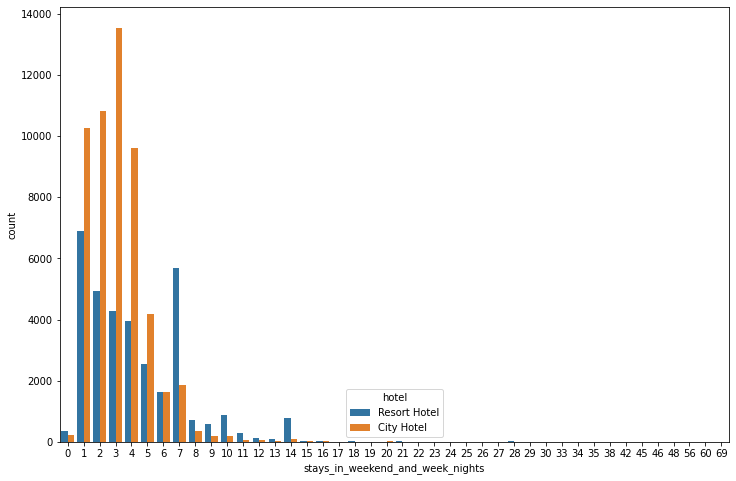

In [ ]:
# grouped by bar chart.
plt.rcParams['figure.figsize']=(12,8)
sns.countplot(x='stays_in_weekend_and_week_nights',data=hotel_data_raw, hue= 'hotel')

City hotels are mostly booked in weekend nights and week nights.

# 03)	Which type of hotel get maximum number of cancellation of bookings?

In [ ]:
hotel_data_raw['is_canceled'].value_counts()

0    63219
1    24009
Name: is_canceled, dtype: int64

In [ ]:
# To make the cancelled bookings dataframe.
canceled_df= hotel_data_raw.loc[hotel_data_raw['is_canceled']==1]
canceled_df = pd.DataFrame(canceled_df)

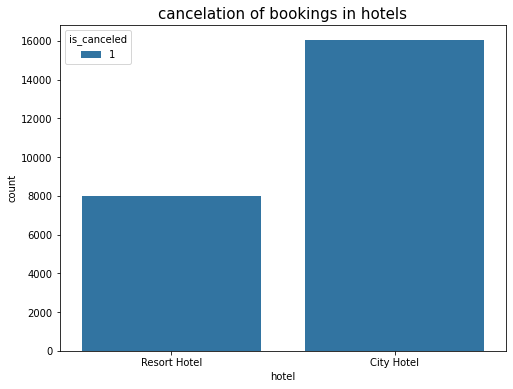

In [ ]:
# Bar chart
fig = plt.gcf() # gcf - greatest commom factor to adjust the figsize well.
fig.set_size_inches(8, 6) 
plt.title("cancelation of bookings in hotels", fontsize = 15) 
sns.countplot(x='hotel', data=canceled_df, hue ='is_canceled')

City Hotel has maximum number of cancellation of bookings as compared to Resort Hotel.

#04) Which type of distribution channel are mostly used for which hotel type?

In [ ]:
hotel_data_raw['distribution_channel'].value_counts()

TA/TO        69027
Direct       12953
Corporate     5062
GDS            181
Undefined        5
Name: distribution_channel, dtype: int64

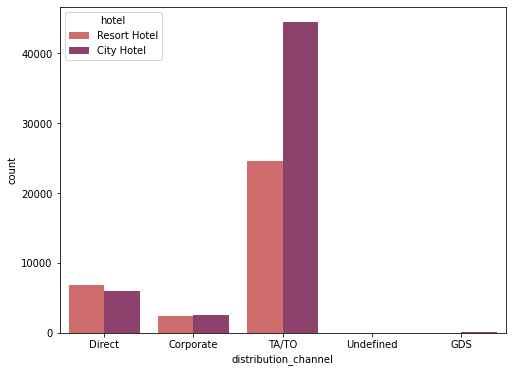

In [ ]:
fig = plt.gcf() 
fig.set_size_inches(8, 6) 
sns.countplot(x='distribution_channel',data=hotel_data_raw, hue= 'hotel',palette = 'flare')

Most of the rooms of city hotels are sold by TA/TO distribution channel as compared to resort hotel.

## 05)	Which type of hotels have maximum repeated guests?

In [ ]:
hotel_data_raw['is_repeated_guest'].value_counts()
# 0 - not repeated guest.
# 1 - repeated guest.

0    83864
1     3364
Name: is_repeated_guest, dtype: int64

In [ ]:
repeated_guest= hotel_data_raw.loc[hotel_data_raw['is_repeated_guest']==1,'hotel'].value_counts(normalize = True)*100
repeated_guest = pd.DataFrame(repeated_guest,columns = ['hotel'])
repeated_guest

,hotel
Resort Hotel,50.743163
City Hotel,49.256837


Text(0, 0.5, 'repeated_guest (%)')

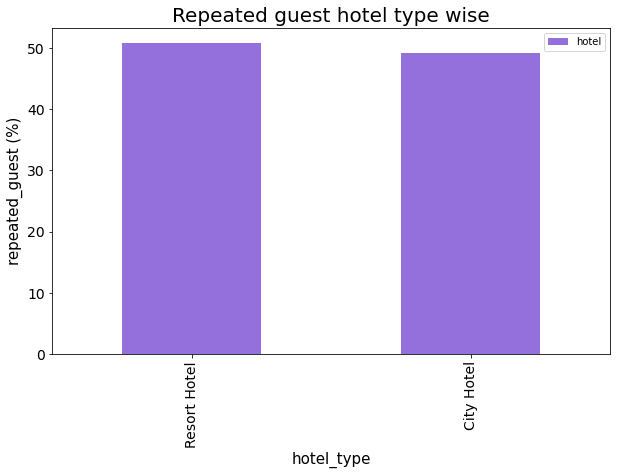

In [ ]:
ax = repeated_guest.plot.bar(color = ['mediumpurple'],figsize = (10,6),fontsize =14)
ax.set_title('Repeated guest hotel type wise',fontsize = 20)
ax.set_xlabel('hotel_type',fontsize=15)
ax.set_ylabel('repeated_guest (%)',fontsize=15)

 Resort hotel type has maximum repeated guest as compared to city hotel.

# 06)Which hotel type got the higher number of special requests?

In [ ]:
hotel_data_raw['total_of_special_requests'].value_counts()

0    43787
1    28976
2    11795
3     2314
4      320
5       36
Name: total_of_special_requests, dtype: int64

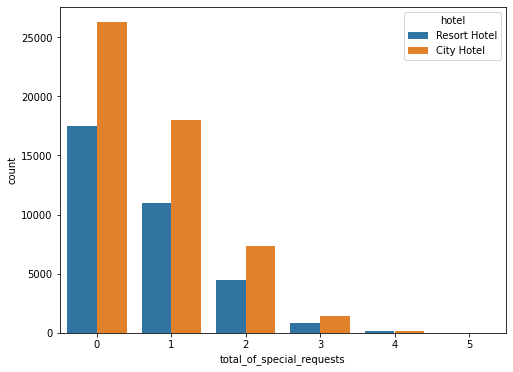

In [ ]:
# Group bar chart.
fig = plt.gcf() 
fig.set_size_inches(8, 6) 
sns.countplot(x='total_of_special_requests',data=hotel_data_raw, hue= 'hotel')

The city hotel got the higher number of special requests.

# 07)	Bookings trend of hotels (city hotel and resort hotel) month wise.

In [ ]:
# To make the order monthwise
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September','October', 'November', 'December']
df_not_canceled = hotel_data_raw[hotel_data_raw['is_canceled'] == 0]
# df_not_canceled
sorted_months = df_not_canceled['arrival_date_month'].value_counts().reindex(new_order)
#sorted_months = df_not_canceled['arrival_date_month'].value_counts()
sorted_months

January      3647
February     4671
March        5660
April        5493
May          5902
June         5403
July         6847
August       7620
September    5041
October      5279
November     3921
December     3735
Name: arrival_date_month, dtype: int64

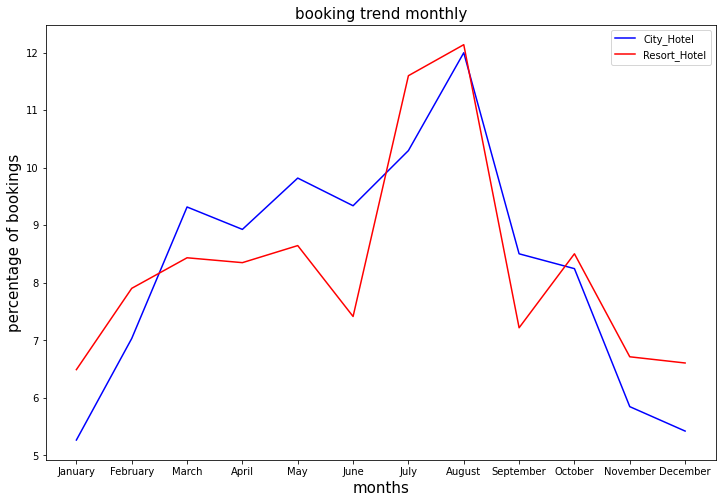

In [ ]:
#select only city hotel
sorted_months_1 = df_not_canceled.loc[hotel_data_raw.hotel=='City Hotel','arrival_date_month'].value_counts().reindex(new_order)
# select only Resort hotel
sorted_months_2 = df_not_canceled.loc[hotel_data_raw.hotel=='Resort Hotel','arrival_date_month'].value_counts().reindex(new_order)

x = sorted_months_1.index
y = sorted_months_1/sorted_months_1.sum()*100

w = sorted_months_2.index
z = sorted_months_2/sorted_months_2.sum()*100

plt.plot(x,y, label='City_Hotel', color='blue')
plt.plot(w,z, label='Resort_Hotel', color='red')
plt.legend()
plt.xlabel("months", fontsize = 15)
plt.ylabel('percentage of bookings', fontsize = 15)
plt.title('booking trend monthly', fontsize=15)
plt.show()
plt.rcParams['figure.figsize']=(15,5)

From the graph, we can say, trend of booking for resort hotel which indicated by red line and city hotel which indicated by blue line is kind of similar with a small difference. for the both hotels, more booking is in augest month followed by july month. In october month, percentage of booking for both hotels is same.



# 08)	In which year maximum number of reservation status is checked out?

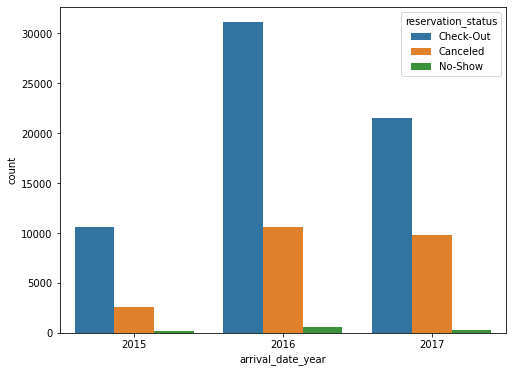

In [ ]:
# grouped bar chart
fig = plt.gcf() 
fig.set_size_inches(8, 6) 
sns.countplot(x='arrival_date_year',data=hotel_data_raw, hue= 'reservation_status')


In 2016, maximun number of reservation_status is checked_out.

# 09)	Comparison of hotels’ ADR (Average Daily Rate) week wise.

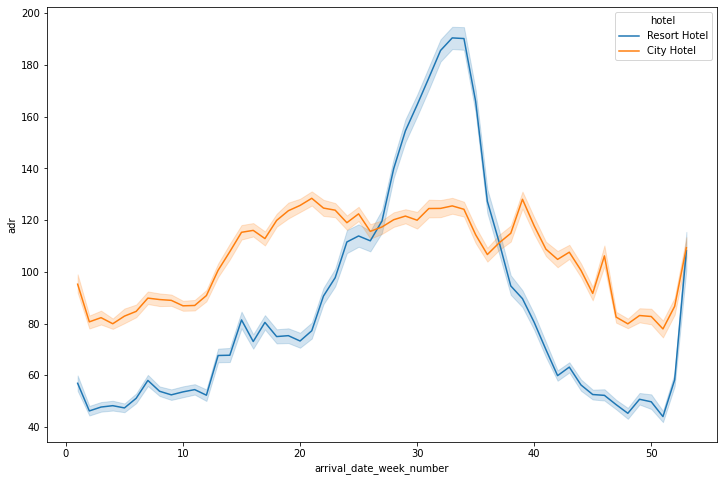

In [ ]:
# lineplot of ADR 
plt.figure(figsize=(12,8))
sns.lineplot(x = 'arrival_date_week_number',y = 'adr', hue='hotel', data=df_not_canceled)

Difference of Adr in both hotel types is high at the starting week of year i.e january month. At the end of week, ADR of both hotel types is same. Avarage Daily Rate (ADR) for the week 28 to 35 (approx) i.e the months of july and August are more for the resort Hotel than city hotel.

# 10)	Which is the most preferrable meal type?

In [ ]:
confirm_bookings = hotel_data_raw[hotel_data_raw['is_canceled']==0]

In [ ]:
meal_type = ['Bed and Breakfast', 'Half Board','Self Catering','Undefined','Full Board']
meal_count = confirm_bookings['meal'].value_counts()

In [ ]:
percentage_meal_count = confirm_bookings['meal'].value_counts(normalize = True)*100
percentage_meal_count

BB           78.871858
HB           10.488935
SC            9.577817
Undefined     0.648539
FB            0.412851
Name: meal, dtype: float64

Text(0, 0.5, 'Percentage of meal counts')

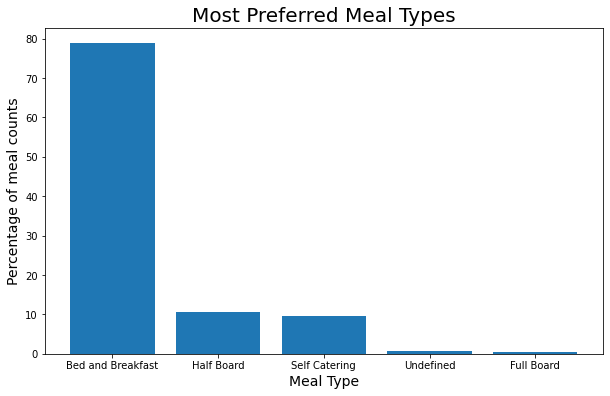

In [ ]:
plt.figure(figsize = (10,6))
plt.bar(meal_type,percentage_meal_count)
plt.title('Most Preferred Meal Types',fontsize = 20)
plt.xlabel('Meal Type',fontsize = 14)
plt.ylabel('Percentage of meal counts',fontsize = 14)

For every customer, BB (Bed and Breakfast) is most preferable meal type.

# 11)	What are the top four countries where the bookings are maximum?

In [ ]:
# confirmed bookings means which are not canceled.
booking_confirmed = hotel_data_raw[hotel_data_raw['is_canceled']==0]

In [ ]:
country_count = booking_confirmed['country'].value_counts()
country_count_df = pd.DataFrame(country_count.head(20), columns = ['country']).reset_index(level=0)
country_count_df

,index,country
0,PRT,17573
1,GBR,8439
2,FRA,7091
3,ESP,5382
4,DEU,4332
5,IRL,2347
6,ITA,1986
7,BEL,1670
8,NLD,1560
9,USA,1411


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


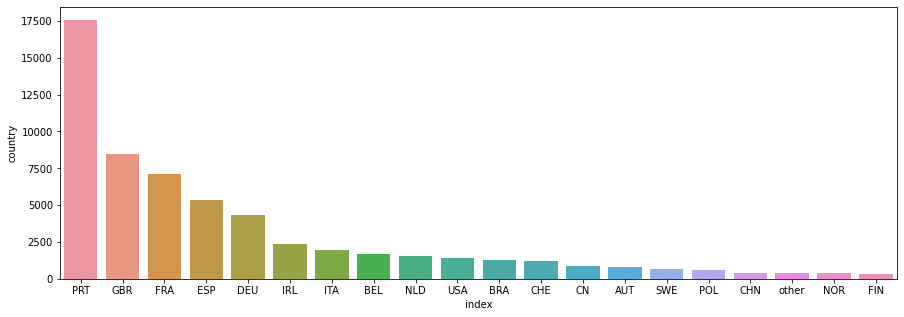

In [ ]:
# bar chart
sns.barplot(country_count_df['index'], country_count_df['country'])

PRT (Portugal), GBR (United Kingdom), FRA (France) and ESP (Spain)
are the top four countries where the booings are maximum.  

# 12) which is the best optimal length of stay in order to get the best daily rate?

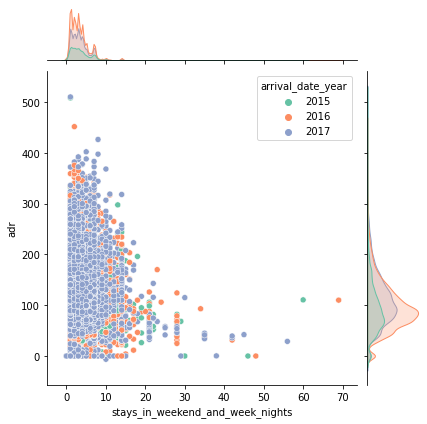

In [ ]:
# To get the confirmed bookings
not_canceled_df= hotel_data_raw.loc[hotel_data_raw['is_canceled']==0]
not_canceled_df = pd.DataFrame(not_canceled_df)
# jointplot plot.
#plt.figure(figsize=(20,15))

sns.jointplot(x='stays_in_weekend_and_week_nights', y='adr', hue = 'arrival_date_year', palette = 'Set2', data=not_canceled_df)
#plt.rcParams["figure.figsize"] = (20,20)

The best optimal length of stay is 1 to 10 week and weekends nights in order to get the best daily rate. As length of total_stay increases the adr decreses. This means for longer stay, the better deal for customer may be. 

# 13) Corelation amongs several variables using heatmap matrix.

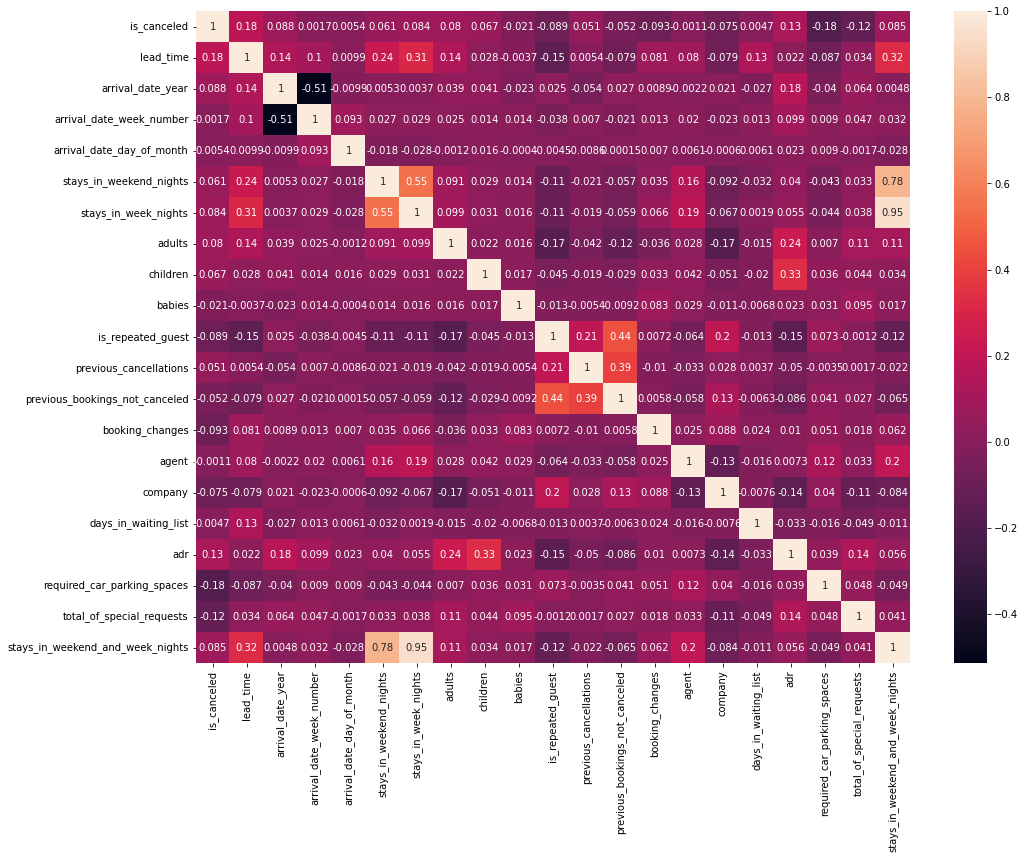

In [ ]:
hotel_data_df = hotel_data_raw
corr_df = hotel_data_df.corr()
corr_df
plt.figure(figsize=(16,12))
sns.heatmap(corr_df, annot=True)

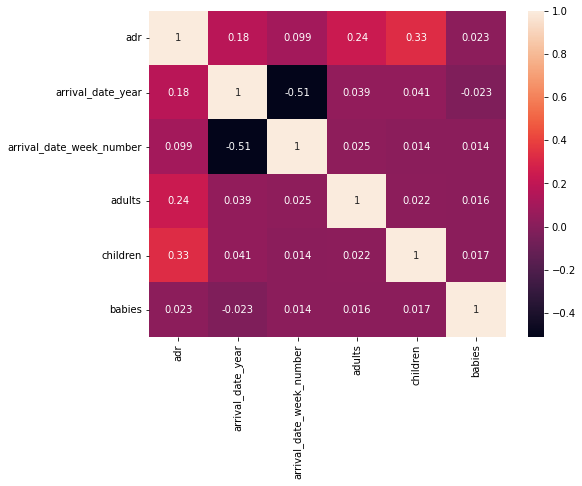

In [ ]:
# To highlight some points by choosing some variables.
hotel_data_df = hotel_data_raw[['adr','arrival_date_year','arrival_date_week_number','adults','children','babies']]
corr_df = hotel_data_df.corr()
corr_df
plt.figure(figsize=(8,6))
sns.heatmap(corr_df, annot=True)

Average daily rate(ADR) is positively correlated to children, adults, and babies with 33%, 25% and 2% respectively. It means that maximum and minimum revenue is generated by occupied rooms with children and babies respectively.

It is observed that arrival_date_week_number and arrival_date_year are 51% negatively cor-related.

# Conclusion


###  The dataset was used that contains data about hotel bookings.

### We analysed some variables and cleaned the data and then we performed the data analysis to extract information from the data to answer the above highligted questions.

### We learned that

* Most hotel rooms are booked in august month which is the best time of year to book a hotel room.

* City hotels are mostly booked in weekend nights and week nights.

* City Hotel has maximum number of cancellation of bookings as compared to Resort Hotel.
* Most of the rooms of city hotels are sold by TA/TO distribution channel as compared to resort hotel.
* The city hotel got the higher number of special requests.


* Trend of booking for resort hotel and city hotel is kind of similar with a small difference. for the both hotels, more booking is in august month followed by july month. In october month, percentage of booking for both hotels is same.

* Difference of Adr in both hotel types is high at the starting week of year i.e january month. At the end of week, ADR of both hotel types is same. Average Daily Rate (ADR) for the week 28 to 35 (approx) i.e the months of july and August are more for the resort Hotel than city hotel.

* In 2016, maximum number of reseervation_status is checked_out.

* For every customer, BB (Bed and Breakfast) is most preferable meal type.

* PRT (Portugal), GBR (United Kingdom), FRA (France) and ESP (Spain) are the top four countries where the bookings are maximum.
* The best optimal length of stay is 1 to 10 week and weekends nights in order to get the best daily rate. As length of total_stay increases the adr decreses. This means for longer stay, the better deal for customer may be.


* Average daily rate(ADR) is positively correlated to children, adults, and babies with 33%, 25% and 2% respectively. It means that maximum and minimum revenue is generated by occupied rooms with children and babies respectively.
It is observed that arrival_date_week_number and arrival_date_year are 51% negatively cor-related.

It was wonderful learning experience while working on this project. This project has developed thinking skills related to the topics. This project gave real insights. we enjoyed each and every moment.
Thank You!

